**Valencia Elcheiana - 0706022210036**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [156]:
#Import necessary libraries
import pandas as pd  #For data manipulation and analysis
import numpy as np  #For mathematical operations and working with arrays
import matplotlib.pyplot as plt  #For basic plotting and visualization
import seaborn as sns  #For advanced data visualization
from sklearn.preprocessing import LabelEncoder  #To convert categorical data into numeric form
from sklearn.model_selection import train_test_split  #To split the dataset into training and testing sets
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  #For evaluating model performance

## Load Dataset

In [157]:
#URL of the dataset (in this case, a CSV file hosted on GitHub)
url = 'https://raw.githubusercontent.com/velcheiana/datasets/refs/heads/main/Bank.csv'

#Reading the dataset into a pandas DataFrame
df = pd.read_csv(url, delimiter=";")

#Display 10 random sample rows from the dataset to check the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [158]:
print(df.info()) #used to display a summary of information about a DataFrame structure, including the number of rows, columns, data types, non-null values, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


In [159]:
#Check for 'unknown' values
for col in df.columns:
    if df[col].dtype == 'object':  # Check only for object (string) columns
        if 'unknown' in df[col].unique():
            print(f"Column '{col}' contains 'unknown' values.")

unknown_counts = df.apply(lambda x: (x == 'unknown').sum())
print(unknown_counts)

Column 'job' contains 'unknown' values.
Column 'education' contains 'unknown' values.
Column 'contact' contains 'unknown' values.
Column 'poutcome' contains 'unknown' values.
age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64


In [160]:
print(df.isnull().sum()) #Check for null values in the DataFrame

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [161]:
df.describe() #used to generate descriptive statistics (such as mean, median, standard deviation, and quartiles) for numerical columns in a DataFrame

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [162]:
unique_counts = df.nunique()
print("Unique value counts per column:\n", unique_counts)

Unique value counts per column:
 age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64


In [163]:
for col in df:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for age:
age
34    231
32    224
31    199
36    188
33    186
     ... 
68      2
87      1
81      1
86      1
84      1
Name: count, Length: 67, dtype: int64


Value counts for job:
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64


Value counts for marital:
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64


Value counts for education:
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64


Value counts for default:
default
no     4445
yes      76
Name: count, dtype: int64


Value counts for balance:
balance
0       357
2        24
1        15
4        13
5        11
       ... 
539       1
1041      1
464       1
7702      1
1137      1
Name: count, Le

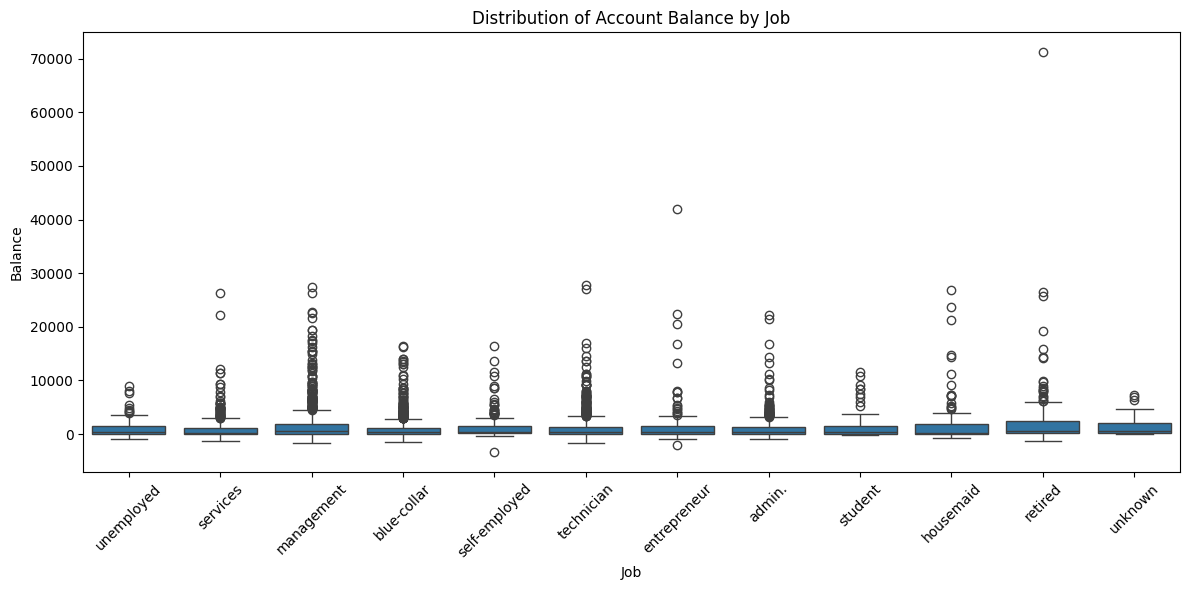

This box plot shows the distribution of bank account balances across different job categories. It highlights the variation in median balances, with some roles, like management and self-employed, tending to have higher balances, while others, such as blue-collar, display lower balances overall.


In [164]:
#Visualization 1: Distribution of Balance by Job
plt.figure(figsize=(12, 6))
sns.boxplot(x='job', y='balance', data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Account Balance by Job")
plt.xlabel("Job")
plt.ylabel("Balance")
plt.tight_layout()
plt.show()

print ("This box plot shows the distribution of bank account balances across different job categories. It highlights the variation in median balances, with some roles, like management and self-employed, tending to have higher balances, while others, such as blue-collar, display lower balances overall.")

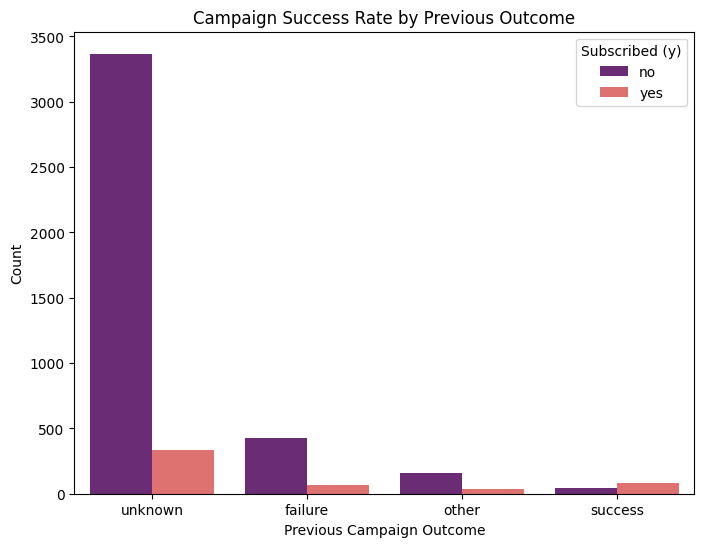

This count plot reveals the distribution of campaign outcomes based on previous contact results. Clients with a successful outcome (success) in a previous campaign tend to have a higher likelihood of subscription (yes) in the current campaign, indicating the potential impact of past positive experiences.


In [165]:
#Visualization 2: Success rate of campaigns based on previous campaign outcomes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='poutcome', hue='y', palette="magma")
plt.title("Campaign Success Rate by Previous Outcome")
plt.xlabel("Previous Campaign Outcome")
plt.ylabel("Count")
plt.legend(title="Subscribed (y)")
plt.show()

print("This count plot reveals the distribution of campaign outcomes based on previous contact results. Clients with a successful outcome (success) in a previous campaign tend to have a higher likelihood of subscription (yes) in the current campaign, indicating the potential impact of past positive experiences.")

In [166]:
#Update 'job' column to merge 'admin' and 'management'
df['job'] = df['job'].replace(['admin', 'management'], 'admin_management')

#Verify the change
print(df['job'].value_counts())

job
admin_management    969
blue-collar         946
technician          768
admin.              478
services            417
retired             230
self-employed       183
entrepreneur        168
unemployed          128
housemaid           112
student              84
unknown              38
Name: count, dtype: int64


In [167]:
#To convert categorical columns (workclass, education, etc.) to numeric
label_encoder = LabelEncoder()

#To identify and select all categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

#To convert each categorical column to numeric
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

#To display 10 random rows of data
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2137,59,2,1,0,0,0,0,0,0,18,9,167,2,-1,0,3,0
1719,48,1,1,1,0,4415,1,0,0,8,0,1032,3,141,7,0,1
1168,33,1,1,2,0,273,1,0,2,16,8,803,1,-1,0,3,1
1254,32,10,0,0,0,0,0,0,0,15,5,175,4,-1,0,3,0
818,27,2,2,0,0,1209,0,0,0,29,4,283,1,-1,0,3,0
3726,45,9,1,3,0,473,1,0,2,27,8,147,1,-1,0,3,0
313,43,1,1,2,0,2,0,1,0,20,1,472,2,-1,0,3,0
1538,50,2,0,1,0,203,1,0,1,19,9,265,1,127,4,1,0
1175,60,4,1,0,0,517,0,0,2,12,6,1178,3,-1,0,3,0
3159,35,0,1,1,0,725,1,0,0,20,9,219,7,133,1,0,0


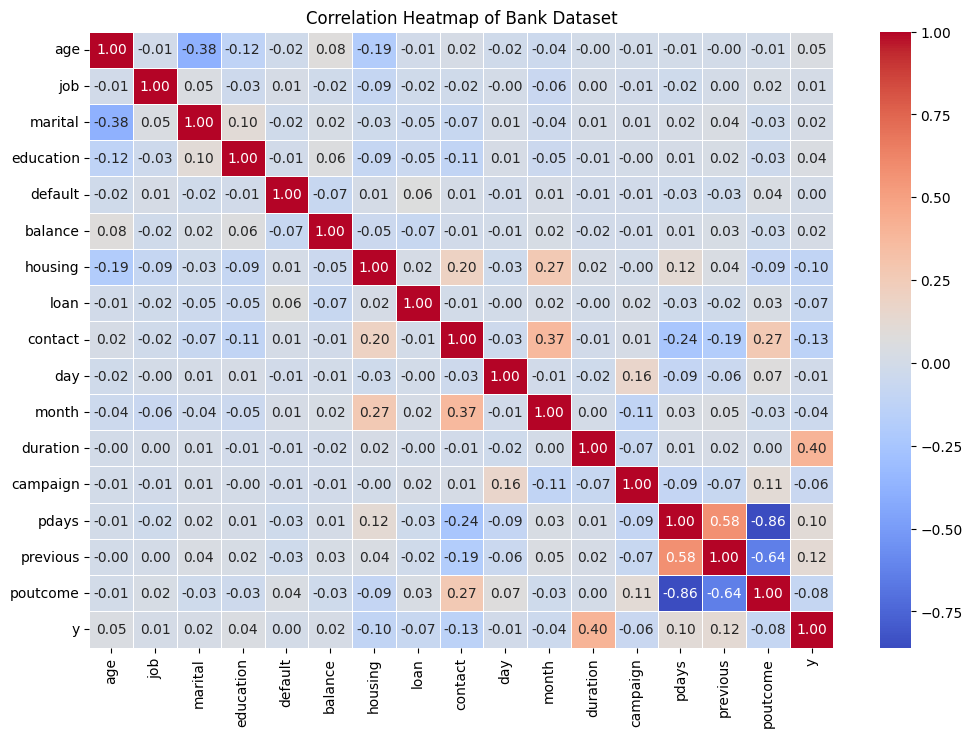

In [168]:
#Assuming 'df' is your DataFrame with encoded values

#Compute the correlation matrix, excluding non-numeric columns
corr_matrix = df.select_dtypes(include=np.number).corr()

#Set up the matplotlib figure
plt.figure(figsize=(12, 8))

#Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

#Display the plot
plt.title("Correlation Heatmap of Bank Dataset")
plt.show()

## Machine Learning (Split Data)

In [169]:
X = df.drop(columns=['duration','pdays', 'previous'])
y = df['y']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3616, 14)
X_test shape: (905, 14)
y_train shape: (3616,)
y_test shape: (905,)


## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [171]:
#a.
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [172]:
#b.
y_pred = rf_clf.predict(X_test)

In [173]:
#c.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 1.0


In [174]:
#print the scores on training and test set
print('Training set score: {:.4f}'.format(rf_clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf_clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [175]:
#d.
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[807   0]
 [  0  98]]


In [176]:
#e.
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       807
           1       1.00      1.00      1.00        98

    accuracy                           1.00       905
   macro avg       1.00      1.00      1.00       905
weighted avg       1.00      1.00      1.00       905



In [177]:
from imblearn.over_sampling import SMOTE

#Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

#a.
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_resampled, y_resampled)

#b.
y_pred = rf_clf.predict(X_test)

#c.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

print('Training set score: {:.4f}'.format(rf_clf.score(X_resampled, y_resampled)))
print('Test set score: {:.4f}'.format(rf_clf.score(X_test, y_test)))

#d.
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

#e.
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

#f.
#There was no change in the accuracy score when applying SMOTE. The accuracy of the random forest remained at 1.00.

Accuracy Score: 1.0
Training set score: 1.0000
Test set score: 1.0000
Confusion Matrix:
 [[807   0]
 [  0  98]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       807
           1       1.00      1.00      1.00        98

    accuracy                           1.00       905
   macro avg       1.00      1.00      1.00       905
weighted avg       1.00      1.00      1.00       905



## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [179]:
# a.
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(n_estimators=100,
                                     learning_rate=0.1,
                                     random_state=42,
                                     max_features=3)
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_features=3, random_state=42)

In [180]:
#b.
y_pred_en = gbc_clf.predict(X_test)

In [181]:
#c.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 1.0


In [182]:
print('Training set score: {:.4f}'.format(gbc_clf.score(X_resampled, y_resampled)))
print('Test set score: {:.4f}'.format(gbc_clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [183]:
#d.
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[807   0]
 [  0  98]]


In [184]:
#e.
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       807
           1       1.00      1.00      1.00        98

    accuracy                           1.00       905
   macro avg       1.00      1.00      1.00       905
weighted avg       1.00      1.00      1.00       905



In [185]:
#Apply SMOTE
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN()
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20, random_state = 42)

#a.
gbc_clf = GradientBoostingClassifier(n_estimators=100,
                                   learning_rate=0.1,
                                   random_state=42,
                                   max_features=3)

gbc_clf.fit(X_train, y_train)

#b.
y_pred = gbc_clf.predict(X_test)

#c.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

print('Training set score: {:.4f}'.format(gbc_clf.score(X_resampled, y_resampled)))
print('Test set score: {:.4f}'.format(gbc_clf.score(X_test, y_test)))

#d.
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

#e.
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

#f.
#There was no change in the accuracy score when applying SMOTE. The accuracy of the Gradient Boosting Classifier remained at 1.00. however, there was a change in the confussion matrix.

Accuracy Score: 1.0
Training set score: 1.0000
Test set score: 1.0000
Confusion Matrix:
 [[409   0]
 [  0 616]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       1.00      1.00      1.00       616

    accuracy                           1.00      1025
   macro avg       1.00      1.00      1.00      1025
weighted avg       1.00      1.00      1.00      1025

